# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 24.04.2025

Мягкий дедлайн: 13.05.2025 23:59 MSK

Жесткий дедлайн: 18.05.2025 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [2]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [5]:
mn = df['Class'].mean()
print(f'Доля положительных объектов в выборке: {mn}')

Доля положительных объектов в выборке: 0.001727485630620034


Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [6]:
df['hour'] = ((df['Time'] / 3600) % 24).apply(int)
df['day'] = (df['Time'] / (3600 * 24)).apply(int)

In [7]:
num_days = df['day'].max() + 1
print(f'Данные покрывают {num_days} дня')

Данные покрывают 2 дня


Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

In [8]:
sns.set(font_scale = 1.2)

''

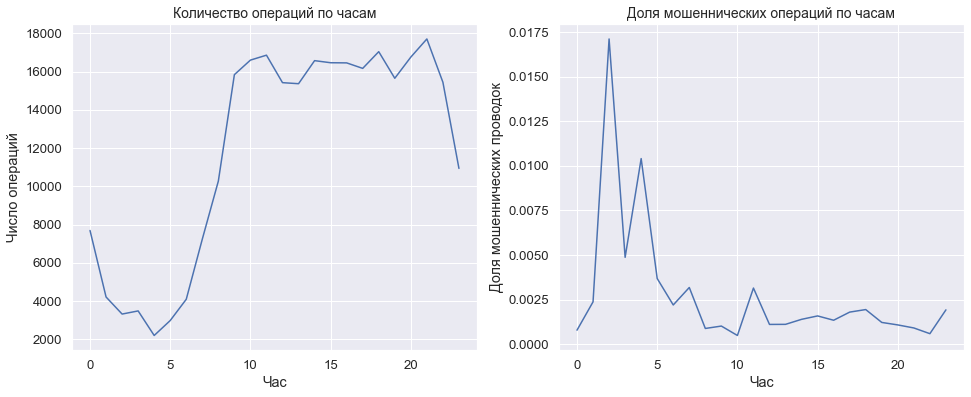

In [9]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.title('Количество операций по часам', fontsize = 14)
plt.xlabel('Час')
plt.ylabel('Число операций')
num_operations = df['hour'].value_counts().sort_index().values    # считаем для каждого часа число транзакций
sns.lineplot(x = np.arange(24), y = num_operations)

plt.subplot(1, 2, 2)
plt.title('Доля мошеннических операций по часам', fontsize = 14)
plt.xlabel('Час')
plt.ylabel('Доля мошеннических проводок')
scam = df.groupby('hour')['Class'].mean().values                  # для каждого часа среднее по Class
sns.lineplot(x = np.arange(24), y = scam)
;

''

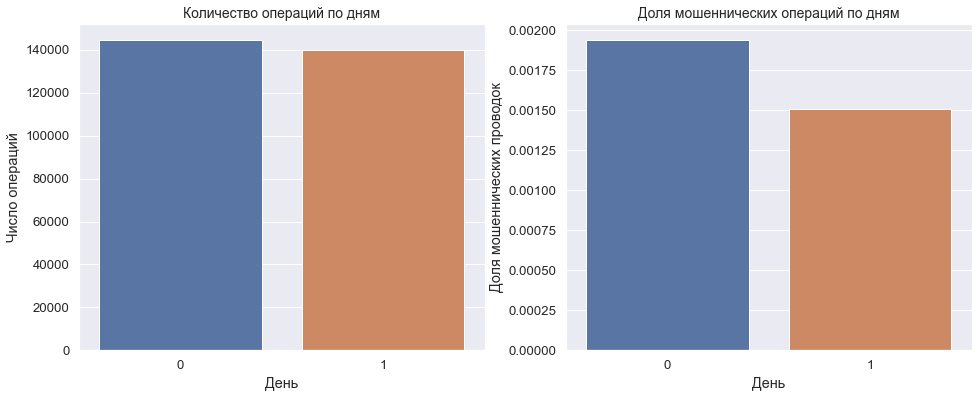

In [10]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.title('Количество операций по дням', fontsize = 14)
plt.xlabel('День')
plt.ylabel('Число операций')
operations_days = df['day'].value_counts().sort_index().values    # считаем для каждого часа число транзакций
sns.barplot(x = [0, 1], y = operations_days)

plt.subplot(1, 2, 2)
plt.title('Доля мошеннических операций по дням', fontsize = 14)
plt.xlabel('День')
plt.ylabel('Доля мошеннических проводок')
scam_days = df.groupby('day')['Class'].mean().values                  # для каждого часа среднее по Class
sns.barplot(x = [0, 1], y = scam_days)
;

Из графиков можно увидеть, что распределение транзакций по дням примерно одинаковое, в то же время в первый день доля мошеннических операций заметно побольше.

Что касается часов, то тут число операций убывает с 0 до 5, потом постепенно растет и выходит на плато примерно в 10, а в 20 снова начинает убывать. Если сравнивать с реальными часами в сутках, то мне кажется промежуток от 0 до 5 это время когда люди спят (5 - это что-то типо 7-8 утра), тут как раз много мошеннических проводок и мало операций в принципе, потом число операций растет в течение дня, а число скама убывает, и где-то в 21 люди снова ложатся спать (то есть это что-то типа 00:00)

В общем мне кажется, что мошенники орудуют именно ночью, возможно это на самом деле не так, но как минимум, если судить по активности, получается именно так.

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [11]:
np.abs(df.corr())['Class'].sort_values(ascending = False)[:4]

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
Name: Class, dtype: float64

Как мы видим, наиболее высокую корреляцию с таргетом показывают признаки 12, 14 и 17. Посмотрим на их распределения для разных классов:

''

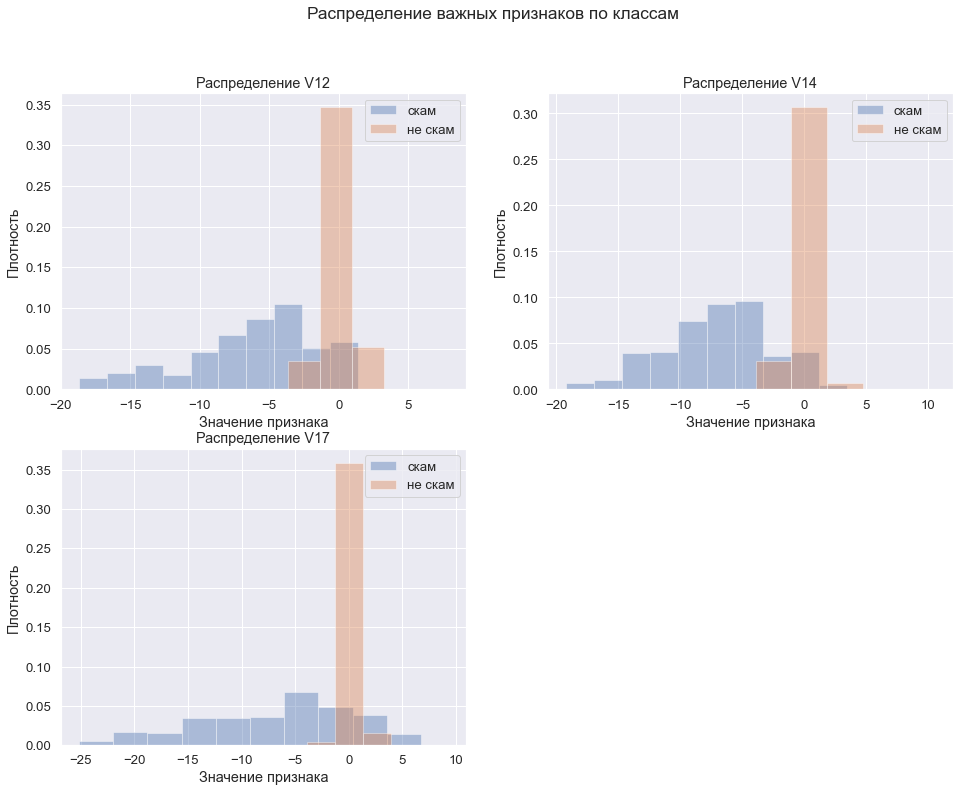

In [12]:
plt.figure(figsize=(16, 12))
plt.suptitle('Распределение важных признаков по классам')

plt.subplot(2, 2, 1)
plt.hist(df[df['Class'] == 1]['V12'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V12'], density=True, alpha=0.4, label='не скам')
plt.title('Распределение V12')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df[df['Class'] == 1]['V14'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V14'], density=True, alpha=0.4, label='не скам')
plt.title('Распределение V14')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df[df['Class'] == 1]['V17'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V17'], density=True, alpha=0.4, label='не скам')
plt.title('Распределение V17')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()
;

Решил отразить именно плотность, чтобы можно было наложить графики (понятно, что наблюдений со скамом сильно меньше). Тут мы видим, что для каких-то значений признаков встречается только один класс

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns = 'Class')
y = df['Class']

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size = 0.5, shuffle = False)

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога. 

В группе писали, что не нужно метрики считать вручную, так что просто импортирую

In [15]:
from sklearn.metrics import average_precision_score

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [16]:
from sklearn.metrics import cohen_kappa_score

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$ 

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом. 

In [17]:
from sklearn.metrics import matthews_corrcoef

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [18]:
pred_naive = np.zeros(shape = len(y_test))

pr_naive = average_precision_score(y_test, pred_naive)
ck_naive = cohen_kappa_score(y_test, pred_naive)
matt_naive = matthews_corrcoef(y_test, pred_naive)

df_metrics = pd.DataFrame(columns = ['AUC-PR', 'Cohen-Kappa', 'Matthews Corr'])
df_metrics.loc['Naive'] = [pr_naive, ck_naive, matt_naive]
df_metrics

,AUC-PR,Cohen-Kappa,Matthews Corr
Naive,0.000772,0.0,0.0


Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`). 

In [19]:
from catboost import CatBoostClassifier

In [20]:
model_cat = CatBoostClassifier(random_state = 52)
model_cat.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_cat_proba = model_cat.predict_proba(X_test)[:, 1]
pred_cat = model_cat.predict(X_test)

pr_cat = average_precision_score(y_test, pred_cat_proba)
ck_cat = cohen_kappa_score(y_test, pred_cat)
matt_cat = matthews_corrcoef(y_test, pred_cat)

df_metrics.loc['Catboost'] = [pr_cat, ck_cat, matt_cat]
df_metrics

,AUC-PR,Cohen-Kappa,Matthews Corr
Naive,0.000772,0.000000,0.000000
Catboost,0.701049,0.717759,0.723739


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [21]:
ratio = (y_train == 0).sum() / (y_train == 1).sum() # находим вес

model_weights = CatBoostClassifier(random_state = 52, scale_pos_weight = ratio)
model_weights.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_weights_proba = model_weights.predict_proba(X_test)[:, 1]
pred_weights = model_weights.predict(X_test)

pr_weights = average_precision_score(y_test, pred_weights_proba)
ck_weights = cohen_kappa_score(y_test, pred_weights)
matt_weights = matthews_corrcoef(y_test, pred_weights)

# полученные метрики
{'AUC-PR': pr_weights, 'Cohen-Kappa': ck_weights, 'Matthews Corr': matt_weights}

{'AUC-PR': 0.6833116184648205,
 'Cohen-Kappa': 0.15725569088299496,
 'Matthews Corr': 0.2529451755706132}

Все метрики хуже, чем для бейзлайна

Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части. 

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

Все действительно сломалось, поэтому перебираем этот параметр:

In [22]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [23]:
def objective_weights(trial):
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.5, 1000)
    
    model_weights = CatBoostClassifier(random_state = 52, scale_pos_weight = scale_pos_weight)
    model_weights.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
    pred_weights_proba = model_weights.predict_proba(X_val)[:, 1]
    pr_weights = average_precision_score(y_val, pred_weights_proba)
    
    return pr_weights

study = optuna.create_study(direction='maximize')
study.optimize(objective_weights, n_trials = 10)

best_weight = study.best_trial.params['scale_pos_weight']

Также подберем порог:

In [25]:
def objective_threshold(trial):
    threshold = trial.suggest_float('threshold', 0, 1)
    
    model_threshold = CatBoostClassifier(random_state = 52, scale_pos_weight = best_weight)
    model_threshold.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
    pred_threshold_proba = model_threshold.predict_proba(X_val)[:, 1]
    pred_bin = (pred_threshold_proba > threshold) * 1
    mcc_threshold = matthews_corrcoef(y_val, pred_bin)
    
    return mcc_threshold

study = optuna.create_study(direction='maximize')
study.optimize(objective_threshold, n_trials = 10)

best_threshold = study.best_trial.params['threshold']

Теперь обучаем лучшую модель

In [27]:
model_best = CatBoostClassifier(random_state = 52, scale_pos_weight = best_weight)
model_best.fit(X_train, y_train, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_best_proba = model_best.predict_proba(X_test)[:, 1]
pred_best = (pred_best_proba > best_threshold) * 1

pr_best = average_precision_score(y_test, pred_best_proba)
ck_best = cohen_kappa_score(y_test, pred_best)
matt_best = matthews_corrcoef(y_test, pred_best)

In [28]:
df_metrics.loc['Catboost + weights'] = [pr_best, ck_best, matt_best]
df_metrics

,AUC-PR,Cohen-Kappa,Matthews Corr
Naive,0.000772,0.000000,0.000000
Catboost,0.701049,0.717759,0.723739
Catboost + weights,0.688179,0.761729,0.762596


In [29]:
print(f'Оптимальный вес: {best_weight}')

Оптимальный вес: 570.8593166923457


Почему-то AUC-PR так и не получилось улучшить по сравнению с бейзлайном, а вот остальные метрики уже стали повыше 

**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса. 

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [30]:
#!pip3 install imbalanced-learn
# conda install -c conda-forge imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку. 

In [31]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [32]:
X_train_full, y_train_full = SMOTE(random_state = 52).fit_resample(X_train, y_train)
X_train_half, y_train_half = SMOTE(random_state = 52, sampling_strategy = 0.5).fit_resample(X_train, y_train)
X_train_ten, y_train_ten = SMOTE(random_state = 52, sampling_strategy = 0.1).fit_resample(X_train, y_train)

Сначала пробуем отношение 1:10

In [38]:
model_smote = CatBoostClassifier(random_state = 52)
model_smote.fit(X_train_ten, y_train_ten, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_smote_proba = model_smote.predict_proba(X_test)[:, 1]
pred_smote = model_smote.predict(X_test)

pr_smote = average_precision_score(y_test, pred_smote_proba)
ck_smote = cohen_kappa_score(y_test, pred_smote)
matt_smote = matthews_corrcoef(y_test, pred_smote)

{'AUC-PR': pr_smote, 'Cohen-Kappa': ck_smote, 'Matthews Corr': matt_smote}

{'AUC-PR': 0.7161514228538874,
 'Cohen-Kappa': 0.7439928940257028,
 'Matthews Corr': 0.7441944677557768}

Теперь смотрим на отношение 1:2

In [39]:
model_smote = CatBoostClassifier(random_state = 52)
model_smote.fit(X_train_half, y_train_half, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_smote_proba = model_smote.predict_proba(X_test)[:, 1]
pred_smote = model_smote.predict(X_test)

pr_smote = average_precision_score(y_test, pred_smote_proba)
ck_smote = cohen_kappa_score(y_test, pred_smote)
matt_smote = matthews_corrcoef(y_test, pred_smote)

{'AUC-PR': pr_smote, 'Cohen-Kappa': ck_smote, 'Matthews Corr': matt_smote}

{'AUC-PR': 0.726751237879133,
 'Cohen-Kappa': 0.7270618976581942,
 'Matthews Corr': 0.7270618976581941}

Наконец, делаем равные доли для классов:

In [40]:
model_smote = CatBoostClassifier(random_state = 52)
model_smote.fit(X_train_full, y_train_full, eval_set = (X_val, y_val), use_best_model = True, verbose = False)

pred_smote_proba = model_smote.predict_proba(X_test)[:, 1]
pred_smote = model_smote.predict(X_test)

pr_smote = average_precision_score(y_test, pred_smote_proba)
ck_smote = cohen_kappa_score(y_test, pred_smote)
matt_smote = matthews_corrcoef(y_test, pred_smote)

{'AUC-PR': pr_smote, 'Cohen-Kappa': ck_smote, 'Matthews Corr': matt_smote}

{'AUC-PR': 0.7379240532520305,
 'Cohen-Kappa': 0.7439928940257028,
 'Matthews Corr': 0.7441944677557768}

Лучше всего работает выравнивание классов пополам. Интересно, что отношение 1:10 показывает качество лучше по двум метрикам, чем 1:2. Возможно, иногда нам и не нужен прям идеальный баланс классов, а достаточно просто репрезентативной выборки

**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

**BorderlineSMOTE** - Работает в целом так же как и обычный SMOTE, просто здесь он применяется не ко всем объектам, а к тем, которые лежат на границе между классами, так как именно они считаются более сложными для прогнозирования, им стоит уделять больше внимания (объекты минорного класса, которые лежат далеко от границы модели проще различать). В общем суть метода: выбираем случайный объект из минорного класса, у которого в соседях много объектов из чужого класса, а дальше для него находим k ближайших соседей из своего класса, из них выбираем одного и так же берем точку между ними и добавляем в выборку. То есть применяем преобразования именно к граничным объектам

**SVM-SMOTE** - Этот метод также основан на поиске граничных объектов, но только теперь мы ищем их не сами, а запускаем SVM на наших данных, он строит разделяющую гиперплоскость между двумя классами, а также позволяет определить опорные вектора, которые ближе всего находятся к границе. Дальше мы выбираем опорные объекты только из минорного класса и используем классический SMOTE только на них. Как и в предыдущем случае получаем новые объекты и записываем их в выборку

**K-Means-SMOTE** - Тут алгоритм примерно такой: сначала запускаем K-means кластеризацию на наших данных и получаем определенное число кластеров. Дальше пробегаемся по ним и считаем отношение числа объектов из маленького класса к большом, дальше работаем только с кластерами, где это отношение больше 1. Внутри каждого такого кластера запускаем обычный SMOTE и так же получаем новые объекты и добавляем в выборку. То есть смысл в том, чтобы генерировать объекты в тех областях, где они чаще всего встречаются. Если что, брал описание [отсюда](https://arxiv.org/pdf/1711.00837)

**ADASYN** - В целом метод похож на BorderlineSMOTE, но отличие в том, что ADASYN не забивает на объекты, среди которых мало точек из мажорного класса, а просто для них генерирует поменьше синтетических объектов. То есть там вроде как присваиваются веса объектам из минорного класса в зависимости от того, насколько они окружены чужими объектами и дальше запускается обычный SMOTE, то есть граничные объекты просто будут выбираться чаще.

Теперь попробуйте сравнить качество всех методов на наших данных.

In [41]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
metrics_smote = pd.DataFrame(columns = ['AUC-PR', 'Cohen-Kappa', 'Matthews Corr'])

In [42]:
X_train_border, y_train_border = BorderlineSMOTE(random_state = 52).fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = ADASYN(random_state = 52).fit_resample(X_train, y_train)
X_train_svm, y_train_svm = SVMSMOTE(random_state = 52).fit_resample(X_train, y_train)
X_train_kmeans, y_train_kmeans = KMeansSMOTE(random_state = 52, cluster_balance_threshold = 0.001).fit_resample(X_train, y_train)

In [43]:
def get_metrics(X, y, X_val = X_val, y_val = y_val, X_test = X_test, y_test = y_test):
    model = CatBoostClassifier(random_state = 52)
    model.fit(X, y, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
    pred_prob = model.predict_proba(X_test)[:, 1]
    pred = (pred_prob > 0.5) * 1
    
    pr_smote = average_precision_score(y_test, pred_prob)
    ck_smote = cohen_kappa_score(y_test, pred)
    matt_smote = matthews_corrcoef(y_test, pred)
    return [pr_smote, ck_smote, matt_smote]

metrics_smote.loc['Borderline SMOTE'] = get_metrics(X_train_border, y_train_border)
metrics_smote.loc['SVM SMOTE'] = get_metrics(X_train_svm, y_train_svm)
metrics_smote.loc['KMeans SMOTE'] = get_metrics(X_train_kmeans, y_train_kmeans)
metrics_smote.loc['ADASYN'] = get_metrics(X_train_adasyn, y_train_adasyn)

In [44]:
metrics_smote

,AUC-PR,Cohen-Kappa,Matthews Corr
Borderline SMOTE,0.693126,0.761729,0.762596
SVM SMOTE,0.691002,0.695407,0.696066
KMeans SMOTE,0.675263,0.714075,0.714888
ADASYN,0.732942,0.695407,0.696066


На самом деле тут нет какого-то однозначного лидера, но если смотреть по нашим новым метрикам $\kappa$ и $\text{MCC}$, то лучше всех показывает себя Borderline SMOTE. В то же время ADASYN показал лучшее качество по AUC-PR. SVM и Kmeans особо ничем не выделяются, работают даже хуже обычного SMOTE.

**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
def get_metrics_under(X = X_train, y = y_train, X_val = X_val, y_val = y_val, X_test = X_test, y_test = y_test):
    prs = []
    cks = []
    matts = []
    ratios_samples = []
    sample_size = X.shape[0]
    ratios = [0.05, 0.1, 0.15, 0.2, 0.3]
    
    for ratio in ratios:     # преобразуем нашу выборку, строим на ней прогноз
        X_new, y_new = RandomUnderSampler(random_state = 52, sampling_strategy = ratio).fit_resample(X, y)
        model = CatBoostClassifier(random_state = 52)
        model.fit(X_new, y_new, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
        pred_prob = model.predict_proba(X_test)[:, 1]
        pred = (pred_prob > 0.5) * 1
        
        # считаем метрики и сохраняем результаты
        pr_smote = average_precision_score(y_test, pred_prob)
        ck_smote = cohen_kappa_score(y_test, pred)
        matt_smote = matthews_corrcoef(y_test, pred)
        prs.append(pr_smote)
        cks.append(ck_smote)
        matts.append(matt_smote)
        ratios_samples.append(sample_size / X_new.shape[0])
        
    return prs, cks, matts, ratios, ratios_samples
prs, cks, matts, ratios, ratios_samples = get_metrics_under()

''

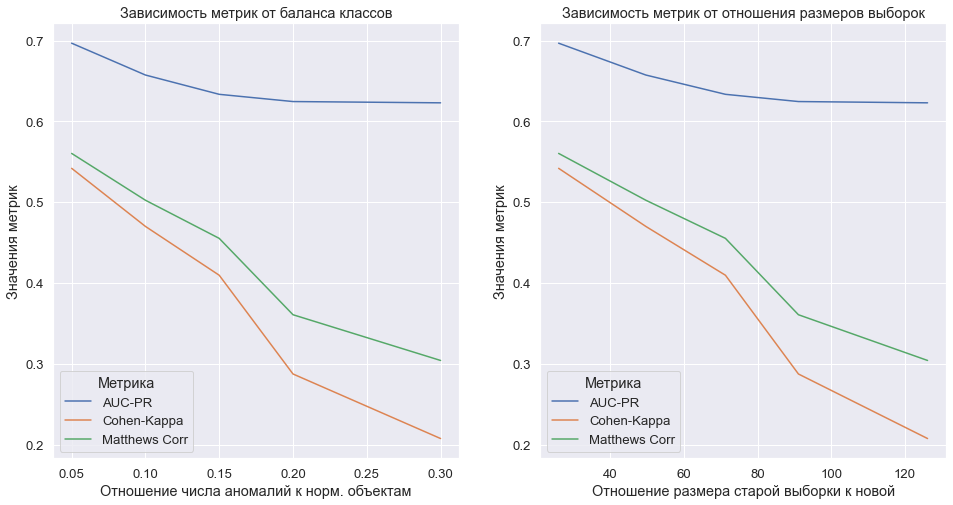

In [48]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.title('Зависимость метрик от баланса классов')
plt.xlabel('Отношение числа аномалий к норм. объектам')
plt.ylabel('Значения метрик')
plt.plot(ratios, prs, label = 'AUC-PR')
plt.plot(ratios, cks, label = 'Cohen-Kappa')
plt.plot(ratios, matts, label = 'Matthews Corr')
plt.legend(title = 'Метрика')

plt.subplot(1, 2, 2)
plt.title('Зависимость метрик от отношения размеров выборок')
plt.xlabel('Отношение размера старой выборки к новой')
plt.ylabel('Значения метрик')
plt.plot(ratios_samples, prs, label = 'AUC-PR')
plt.plot(ratios_samples, cks, label = 'Cohen-Kappa')
plt.plot(ratios_samples, matts, label = 'Matthews Corr')
plt.legend(title = 'Метрика')
;

В целом мы видим, что выкидывание объектов нулевого класса вредит метрикам, однако в начале, когда мы выбрасываем не так много получаются еще более-менее неплохие результаты. Возможно, объекты, которые мы выбрасываем все же являются информативными и в нашем случае лучше добавить новых, чем избавляться от старых.

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [49]:
from imblearn.under_sampling import NearMiss

def get_metrics_near_miss(X = X_train, y = y_train, X_val = X_val, y_val = y_val, X_test = X_test, y_test = y_test):
    prs = []
    cks = []
    matts = []
    k_neighbors = [3, 6, 9, 12, 15]
    ratios = [0.01, 0.025, 0.05, 0.1, 0.15]
    
    # сначала для долей, фиксируем n_neighbors по дефолту
    for ratio in ratios:
        X_new, y_new = NearMiss(sampling_strategy = ratio).fit_resample(X, y)
        model = CatBoostClassifier(random_state = 52)
        model.fit(X_new, y_new, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
        pred_prob = model.predict_proba(X_test)[:, 1]
        pred = (pred_prob > 0.5) * 1
        # чтобы сократить число строчек кода, сразу закидываю метрики в массивы
        prs.append(average_precision_score(y_test, pred_prob)) 
        cks.append(cohen_kappa_score(y_test, pred))
        matts.append(matthews_corrcoef(y_test, pred))
        
    # теперь перебираем n_neighbors для дефолтной доли
    for k in k_neighbors:
        X_new, y_new = NearMiss(n_neighbors = k).fit_resample(X, y)
        model = CatBoostClassifier(random_state = 52)
        model.fit(X_new, y_new, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
        pred_prob = model.predict_proba(X_test)[:, 1]
        pred = (pred_prob > 0.5) * 1

        prs.append(average_precision_score(y_test, pred_prob)) 
        cks.append(cohen_kappa_score(y_test, pred))
        matts.append(matthews_corrcoef(y_test, pred))    
        
    return prs, cks, matts, ratios, k_neighbors
prs, cks, matts, ratios, k_neighbors = get_metrics_near_miss()

''

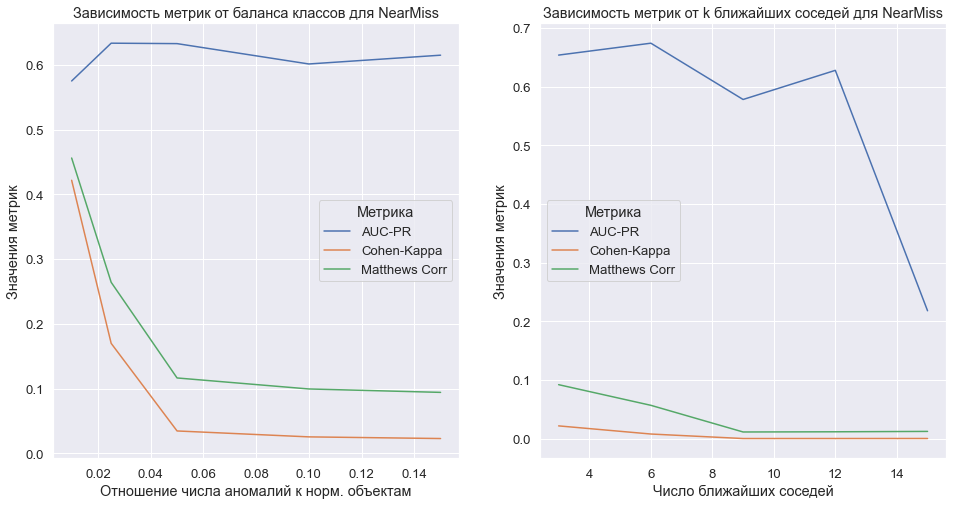

In [50]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.title('Зависимость метрик от баланса классов для NearMiss')
plt.xlabel('Отношение числа аномалий к норм. объектам')
plt.ylabel('Значения метрик')
plt.plot(ratios, prs[:5], label = 'AUC-PR')
plt.plot(ratios, cks[:5], label = 'Cohen-Kappa')
plt.plot(ratios, matts[:5], label = 'Matthews Corr')
plt.legend(title = 'Метрика')

plt.subplot(1, 2, 2)
plt.title('Зависимость метрик от k ближайших соседей для NearMiss')
plt.xlabel('Число ближайших соседей')
plt.ylabel('Значения метрик')
plt.plot(k_neighbors, prs[5:], label = 'AUC-PR')
plt.plot(k_neighbors, cks[5:], label = 'Cohen-Kappa')
plt.plot(k_neighbors, matts[5:], label = 'Matthews Corr')
plt.legend(title = 'Метрика')
;

Снова все получилось так себе, но тут потом говорится, что методы балансировок могут приводить и к таким себе результам. В данном случае так получается из-за того, что сложно подобрать оптимальные параметры. Например, даже доля аномалий в 0.01 дает довольно низкое качество, а с увеличением оно только падает. Разве что AUC-PR может где-то расти, а потом сразу падать. Такая же тенденция и для числа ближайших соседей.

Также я не стал дублировать график для отношения размеров выборок, потому что он по сути дублирует график для баланса классов, просто значения по оси Х другие

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.


В общем я решил выбрать [InstanceHardnessThreshold](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.InstanceHardnessThreshold.html). Сам по себе алгоритм IHT работает так: сначала обучается бинарный классификатор (например, логрег), он определяет "сложность" объекта (насколько низкие вероятности принадлежности к классу), а дальше удаляет наиболее сложные объекты.

In [51]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression

In [52]:
X_IHT, y_IHT = InstanceHardnessThreshold(estimator = LogisticRegression(max_iter = 10**5, random_state = 52),
                                         sampling_strategy = 0.05).fit_resample(X_train, y_train)
model = CatBoostClassifier(random_state = 52)
model.fit(X_IHT, y_IHT, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
pred_prob_IHT = model.predict_proba(X_test)[:, 1]
pred_IHT = (pred_prob_IHT > 0.5) * 1

prs_IHT = average_precision_score(y_test, pred_prob_IHT)
cks_IHT = cohen_kappa_score(y_test, pred_IHT)
matts_IHT = matthews_corrcoef(y_test, pred_IHT)

{'AUC-PR': prs_IHT, 'Cohen-Kappa': cks_IHT, 'Matthews Corr': matts_IHT} # полученные метрики

{'AUC-PR': 0.6305781806728479,
 'Cohen-Kappa': 0.13705084596917227,
 'Matthews Corr': 0.22758263713254512}

Мда, все равно результаты так себе:( В общем oversampling тут работает лучше

# Часть 2. Поиск аномалий. 

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка. 

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных). 

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову). 

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.
- При желании, можете вынести этот код в отдельный файл и приложить его к ноутбуку. Он довольно громоздкий и в ноутбуке такое плохо читается.


**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


Из бонуса вроде как сделал второй пункт. В статье как раз описывалось, что, если мы построим случайный вектор нормали, а потом занулим одну из координат, то extension-level сократится на 1, и так если мы оставим только одну координату в векторе это будет как раз эквивалентно разбиению по одному признаку в обычном Isolation Forest

In [53]:
def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    if n <= 1:
        return np.float32(0)
    
    H_i = np.float32(np.log(n - 1) + 0.5772156649)
    c = np.float32(2 * H_i - 2 * (n - 1) / n)
    
    return c

def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node
        
        depth: int - path length up to current node
        
        node: Node - current tree node
        
    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    scores = np.zeros(X.shape[0], dtype = np.float32)
    
    # если попали в итоговую вершину, то считаем по формуле глубину
    if node.kind == 'external':
        scores += c_factor(node.size) + depth
        return scores
    
    # если не попали, то находим индексы объектов, которые идут влево и вправо и рекурсивно запускаем функцию
    crit_right = (X - node.b) @ node.w > 0
    scores[~crit_right] = calc_height(X[~crit_right], depth + 1, node.left)
    scores[crit_right] = calc_height(X[crit_right], depth + 1, node.right)
    
    return scores

class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.
    
    Attributes:
        X: np.array - data available to current node
        size: int - length of available data
        
        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left, right, kind, w, b):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.
        
        Params:
            X: np.array - data available to current node
            depth: int - depth of node
            
            left: Node - left child
            right: Node - right child
            
            kind: str - either "internal" or "external", indicates the type of current node
            
            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane
            
        """
        self.size = len(X)
        
        self.depth = depth
        
        self.left = left
        self.right = right
        
        self.kind = kind
    
        self.w = w
        self.b = b
    
    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth
        
        max_depth: int - maximum tree depth
        
        root: Node - root node 

        internal_count: int - number of internal nodes

        external_count: int - number of external nodes
        
    """
    def __init__(self, X, max_depth, standard = False):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth

        """
        self.standard = standard
        self.depth = 0
        self.max_depth = max_depth
        
        self.internal_count = 0
        self.external_count = 0

        self.root = self.grow(X, 0)
        
    def __repr__(self):
        """
        For convenience only.
        """
        
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"

        
        
    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample
            
            depth: int - current tree depth
            
        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        # если выполнен критерий останова, возвращаем external node
        if (depth >= self.max_depth) or (X.shape[0] <= 1):
            self.external_count += 1
            return Node(X, depth, None, None, 'external', None, None)
        
        # пока критерий не выполнен, строим дерево
        w = np.random.normal(size = X.shape[1]).astype(np.float32)
        b = np.random.uniform(X.min(axis = 0), X.max(axis = 0), size = X.shape[1]).astype(np.float32)
        
        # если нужно, откатываемся к обычному IF
        if self.standard == True:
            idx_null = np.random.choice(np.arange(X.shape[1]), size = X.shape[1] - 1, replace = False)
            w[idx_null] = 0
        
        crit_right = (X - b) @ w > 0
        left = self.grow(X[~crit_right], depth + 1)
        right = self.grow(X[crit_right] , depth + 1)
        self.internal_count += 1
        
        return Node(X, depth, left, right, 'internal', w, b)

    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated
            
        Returns:
            scores: np.array - estimated anomaly scores
        """
        return calc_height(X, 0, self.root)
        
    
class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees
        
        max_depth: int - maximum depth of each tree
        
        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree
        
        trees: list - container for trained trees 
        
        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding
        
    """
    
    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01, standard = False):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False
        self.standard = standard
        
    def __repr__(self):
        """For convenience only."""
        
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"
        
    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        X = X.astype(np.float32)
        for i in range(self.n_trees):
            idx_batch = np.random.choice(np.arange(X.shape[0], dtype = np.int32),
                        round(self.subsample_rate * X.shape[0]), replace = False)
            X_batch = X[idx_batch]
            
            self.trees.append(RandomizedTree(X_batch, self.max_depth, self.standard))
        return self
    
    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        # для каждого дерева считаем скоры, закидываем в scores_mean
        scores_mean = np.zeros(X.shape[0], dtype = np.float32)
        for tree in self.trees:
            scores_mean += tree.score_samples(X)
        
        # считаем среднее по деревьям и нормализуем
        scores_mean = scores_mean / self.n_trees
        scores = 2 ** (-scores_mean / c_factor(round(self.subsample_rate * X.shape[0])))    

        return scores

    
    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        X = X.astype(np.float32)
        scores = self.score_samples(X)
        labels = np.zeros(len(scores), dtype = np.int32)
        threshold = 1 - self.contamination
        threshold_value = np.percentile(scores, threshold * 100)
        
        labels[scores > threshold_value] = 1
        
        #возвращаем метки и оценки аномальности (типо predict proba)
        return labels, scores

При написании кода здесь я пользовался GPT. Промптом было условие + шаблон и я просил его написать некоторые функции, чтобы не писать с нуля. Но все равно как обычно приходилось исправлять его ошибки, например даже в формуле критерия для разбиения вместо (X - b)w у него была какая-то странная хрень, вообще не как в статье, ну и таких ошибок было много. 

Также код местами может быть нечитаемым, я старался как можно меньше создавать переменных и менять тип данных, чтобы у меня не взорвался ноут

**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

In [54]:
# отмасштабируем данные как нам советовали
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)
X_val_scaled = scaller.transform(X_val)

In [66]:
# подбор параметров, работает минут 15
def objective_forest(trial):
    n_trees = trial.suggest_int('n_trees', 100, 400)
    subsample_rate = trial.suggest_float('subsample_rate', 0.1, 0.7)
    max_depth = trial.suggest_int('max_depth', 6, 12)
    #contamination = trial.suggest_float('contamination', 0.005, 0.05)
    
    model_forest = ExtendedIsolationForest(n_trees, subsample_rate, max_depth)
    model_forest.fit(X_train_scaled)
    pred_forest = model_forest.predict(X_train_scaled)[1]
    score = average_precision_score(y_train, pred_forest)
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_forest, n_trials = 10)

best_params_forest = study.best_trial.params

In [68]:
# оценивание модели
model_forest = ExtendedIsolationForest(best_params_forest['n_trees'], best_params_forest['subsample_rate'],
                                      best_params_forest['max_depth'])
model_forest.fit(X_train_scaled)
pred_forest, pred_proba_forest = model_forest.predict(X_test_scaled)

pr_forest = average_precision_score(y_test, pred_proba_forest)
mat_forest = matthews_corrcoef(y_test, pred_forest)
ck_forest = cohen_kappa_score(y_test, pred_forest)

{'AUC-PR': pr_forest, 'Cohen-Kappa': ck_forest, 'Matthews Corr': mat_forest} # полученные метрики

{'AUC-PR': 0.030848166182771693,
 'Cohen-Kappa': 0.07032791986647324,
 'Matthews Corr': 0.13687708343042446}

По сравнению с supervised методами все конечно так себе. Сравним с обычным IF:

In [69]:
from sklearn.ensemble import IsolationForest

In [70]:
model_if = IsolationForest(n_estimators=best_params_forest['n_trees'],
                           max_samples = best_params_forest['subsample_rate'],
                           contamination=0.01)  # глубину тут не нашел
model_if.fit(X_train_scaled)
pred_if = (model_if.predict(X_test_scaled) == -1) * 1            # выдает -1 на аномалиях

pr_if = average_precision_score(y_test, pred_if)
mat_if = matthews_corrcoef(y_test, pred_if)
ck_if = cohen_kappa_score(y_test, pred_if)

{'AUC-PR': pr_if, 'Cohen-Kappa': ck_if, 'Matthews Corr': mat_if} # полученные метрики

{'AUC-PR': 0.01994828056492866,
 'Cohen-Kappa': 0.06606206306656892,
 'Matthews Corr': 0.13784372125810926}

Ну, в целом немного лучше по двум метрикам. На самом деле мне кажется, что я где-то туплю и подбираю не те параметры. Еще я заметил, что в тесте у нас всего 26 аномалий и на валидации модель работает получше

Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

In [71]:
# берем два таких примера
ex_1, ex_2 = np.where((pred_proba_forest > 0.6) & (y_test == 0))[0][[0, -1]]

Еще в самом начале мы смотрели на самые важные признаки и их распределение. Наверное, стоит посмотреть на то, какие значения этих признаков принимают наши примеры. (Примеры сестрам задевают:))

Красная линия - первый пример, зеленая - второй

''

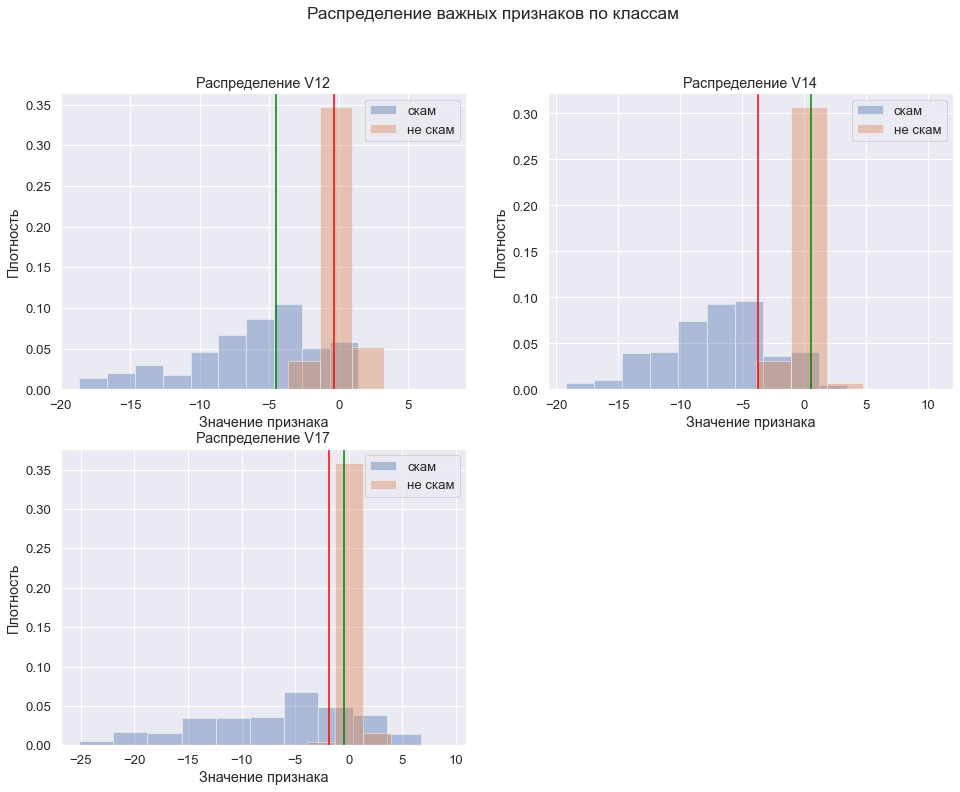

In [72]:
plt.figure(figsize=(16, 12))
plt.suptitle('Распределение важных признаков по классам')

plt.subplot(2, 2, 1)
plt.hist(df[df['Class'] == 1]['V12'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V12'], density=True, alpha=0.4, label='не скам')
plt.axvline(x = X_test.iloc[ex_1]['V12'], color = 'red')
plt.axvline(x = X_test.iloc[ex_2]['V12'], color = 'green')

plt.title('Распределение V12')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df[df['Class'] == 1]['V14'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V14'], density=True, alpha=0.4, label='не скам')
plt.axvline(x = X_test.iloc[ex_1]['V14'], color = 'red')
plt.axvline(x = X_test.iloc[ex_2]['V14'], color = 'green')
plt.title('Распределение V14')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df[df['Class'] == 1]['V17'], density=True, alpha=0.4, label='скам')
plt.hist(df[df['Class'] == 0]['V17'], density=True, alpha=0.4, label='не скам')
plt.axvline(x = X_test.iloc[ex_1]['V17'], color = 'red')
plt.axvline(x = X_test.iloc[ex_2]['V17'], color = 'green')
plt.title('Распределение V17')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.legend()
;

Как мы видим, для этих объектов действительно свойственно попадать в "зоны скама". Возможно именно поэтому модель их и относит к аномалиям.

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [73]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [74]:
# модели учатся очень долго, поэтому обучаю на подвыборке
idx_random = np.random.choice(np.arange(X_train_scaled.shape[0]), 50000, replace = False)
model_lof = LocalOutlierFactor(algorithm = 'kd_tree', novelty = True, contamination=0.01)
model_lof.fit(X_train_scaled[idx_random])
model_svm = OneClassSVM(nu = 0.01)
model_svm.fit(X_train_scaled[idx_random])

pred_lof = model_lof.predict(X_test_scaled)
pred_svm = model_svm.predict(X_test_scaled)

pr_lof = average_precision_score(y_test, pred_lof)
mat_lof = matthews_corrcoef(y_test, pred_lof)
ck_lof = cohen_kappa_score(y_test, pred_lof)

pr_svm = average_precision_score(y_test, pred_svm)
mat_svm = matthews_corrcoef(y_test, pred_svm)
ck_svm = cohen_kappa_score(y_test, pred_svm)

Метрики для Local Outlier Factor:

In [75]:
{'AUC-PR': pr_lof, 'Cohen-Kappa': ck_lof, 'Matthews Corr': mat_lof}

{'AUC-PR': 0.0008283935892375073,
 'Cohen-Kappa': 5.203849558788054e-05,
 'Matthews Corr': 0.002958724398445839}

Метрики для One-class SVM:

In [76]:
{'AUC-PR': pr_svm, 'Cohen-Kappa': ck_svm, 'Matthews Corr': mat_svm}

{'AUC-PR': 0.0006380990775225,
 'Cohen-Kappa': -0.0005727455003674553,
 'Matthews Corr': -0.0586913665651454}

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [77]:
# обучаю на дефолтных признаках, т.к. мы подбирали параметры на трейне, а это не очень хорошо (переобучение все дела)
model_1 = ExtendedIsolationForest(n_trees = 300, subsample_rate = 0.5, max_depth = 8)
model_2 = IsolationForest()

model_1.fit(X_train_scaled)
model_2.fit(X_train_scaled)

models = [model_1, model_2, model_lof, model_svm]
for i in range(4):
    if i == 0:       # для EIF надо взять именно labels [0] 
        new_feature_train = models[i].predict(X_train_scaled)[0]
        new_feature_test = models[i].predict(X_test_scaled)[0]
        new_feature_val = models[i].predict(X_val_scaled)[0]
        X_train[f'feature_{i}'] = new_feature_train
        X_test[f'feature_{i}'] = new_feature_test
        X_val[f'feature_{i}'] = new_feature_val
    else:
        new_feature_train = models[i].predict(X_train_scaled)
        new_feature_test = models[i].predict(X_test_scaled)
        new_feature_val = models[i].predict(X_val_scaled)
        X_train[f'feature_{i}'] = new_feature_train
        X_test[f'feature_{i}'] = new_feature_test
        X_val[f'feature_{i}'] = new_feature_val

Лучший метод по AUC-PR вроде как был бустинг на ADASYN. Метрика тут составила 0.732942	

In [82]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train, y_train)
model = CatBoostClassifier(random_state = 52)
model.fit(X_train_adasyn, y_train_adasyn, eval_set = (X_val, y_val), use_best_model = True, verbose = False)
pred_prob = model.predict_proba(X_test)[:, 1]
pred = (pred_prob > 0.5) * 1

pr = average_precision_score(y_test, pred_prob)
ck = cohen_kappa_score(y_test, pred)
matt  = matthews_corrcoef(y_test, pred)

In [83]:
{'AUC-PR': pr, 'Cohen-Kappa': ck, 'Matthews Corr': matt}

{'AUC-PR': 0.7340362491494793,
 'Cohen-Kappa': 0.5710262074505472,
 'Matthews Corr': 0.5846324363139551}

Как мы видим, по AUC-PR есть небольшое улучшение, но остальные метрики съехали :(

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла. 

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `хочу`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [ ]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)